 - This project delves into the world of literature by analyzing a dataset containing details of over 11.000 books from Goodreads. Through descriptive statistics, distribution analysis, correlation analysis, and other techniques, we uncover insights into genres, languages, publishers, authors, and more. Join us as we unravel the story hidden within the data and explore the diverse landscape of books.

In [2]:
#Import libraries

import pandas as pd
pd.set_option("display.max_columns", None)
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.corpus import stopwords
import string


In [4]:
#Reading DataFrames from csv files

booksG = pd.read_csv("booksG_clean.csv")
booksG.head()

,bookID,title,authors,average_rating,isbn,isbn13,language,num_pages,ratings_count,reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,English,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,English,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,English,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,English,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,English,2690,41428,164,9/13/2004,Scholastic


# 1.Descriptive Statistics:

- Count the number of books published by date, authors, average rating, language, number of pages, ratings count, reviews count and publisher.
- Determine the most common author.
- Use the describe() method to obtain summary statistics for numerical columns such as average_rating, num_pages, ratings_count, and reviews_count.

In [278]:
# Identify the earliest and latest publication years

earliest_year = booksG["publication_date"].min()
latest_year = booksG["publication_date"].max()

print(f"Earliest publication year: {earliest_year}\nLatest publication year: {latest_year}")

Earliest publication year: 1/1/1900
Latest publication year: 9/9/2010


In [279]:
# Books first published in 1900

earlieast_books = booksG[booksG["publication_date"] == "1/1/1900"]
earlieast_books

,bookID,title,authors,average_rating,isbn,isbn13,language,num_pages,ratings_count,reviews_count,publication_date,publisher
9375,37134,Consider the Lilies,Iain Crichton Smith/Isobel Murray,3.88,0753812932,9780753812938,English,144,332,33,1/1/1900,Polygon


In [280]:
# Book last published in 2010

latest_books = booksG[booksG["publication_date"] == "9/9/2010"]
latest_books

,bookID,title,authors,average_rating,isbn,isbn13,language,num_pages,ratings_count,reviews_count,publication_date,publisher
6853,25807,The Postman Always Rings Twice,James M. Cain,3.8,0752861743,9780752861746,English,116,23157,1287,9/9/2010,Orion


In [281]:
# Count the number of books published by date

books_published_by_date = booksG["publication_date"].value_counts(ascending=False).head(10)
books_published_by_date

publication_date
10/1/2005    56
11/1/2005    53
9/1/2006     51
10/1/2006    48
11/1/2006    40
7/1/2004     39
8/1/2006     39
7/1/2003     37
10/1/2004    37
8/1/2005     37
Name: count, dtype: int64

In [282]:
# Count the number of books published by authors

books_published_by_authors = booksG["authors"].value_counts(ascending=False)
books_published_by_authors

authors
Stephen King                                              40
P.G. Wodehouse                                            40
Rumiko Takahashi                                          39
Orson Scott Card                                          35
Agatha Christie                                           33
                                                          ..
Ian Glasper                                                1
Legs McNeil/Gillian McCain                                 1
Adam Woog                                                  1
Mikal Gilmore                                              1
William T. Vollmann/Larry McCaffery/Michael Hemmingson     1
Name: count, Length: 6643, dtype: int64

In [283]:
# Count the number of books published by average_rating

books_published_by_country = booksG["average_rating"].value_counts(ascending=False).head(10)
books_published_by_country

average_rating
4.00    219
3.96    195
4.02    178
3.94    176
4.07    172
4.05    168
3.92    168
3.93    168
3.89    166
3.83    166
Name: count, dtype: int64

In [318]:
# Count the number of books published by language

books_published_by_language = booksG["language"].value_counts(ascending=False)
books_published_by_language

language
English               8911
Spanish                218
French                 144
German                  99
Japanese                46
Multiple languages      19
Chinese                 14
Ancient Greek           11
Portuguese              10
Italian                  5
Latin                    3
Middle English           3
Russian                  2
Swedish                  2
Dutch                    1
Arabic                   1
Serbian                  1
Malay                    1
Galician                 1
Welsh                    1
Norwegian                1
Turkish                  1
Scottish Gaelic          1
Aleut                    1
Name: count, dtype: int64

In [285]:
# Count the number of books published by number of pages

books_published_by_num_pages = booksG["num_pages"].value_counts(ascending=False)
books_published_by_num_pages

num_pages
288     230
192     221
320     218
256     207
352     202
       ... 
1046      1
976       1
1440      1
25        1
22        1
Name: count, Length: 997, dtype: int64

In [286]:
# Count the number of books published by ratings count

books_published_by_ratings_count = booksG["ratings_count"].value_counts(ascending=False)
books_published_by_ratings_count

ratings_count
3         82
0         81
1         76
4         71
2         71
          ..
21507      1
6970       1
108440     1
66503      1
783        1
Name: count, Length: 5294, dtype: int64

In [287]:
# Count the number of books published by reviews count

books_published_by_reviews_count = booksG["reviews_count"].value_counts(ascending=False)
books_published_by_reviews_count

reviews_count
0        625
1        458
2        354
3        263
4        249
        ... 
4496       1
8251       1
13070      1
688        1
1830       1
Name: count, Length: 1822, dtype: int64

In [288]:
# Count the number of books for each publisher

publisher_counts = booksG["publisher"].value_counts()
publisher_counts.head(10) # Top 10 publishers

publisher
Vintage             318
Penguin Books       261
Penguin Classics    184
Mariner Books       150
Ballantine Books    144
Harper Perennial    112
HarperCollins       112
Pocket Books        111
Bantam              110
VIZ Media LLC        88
Name: count, dtype: int64

In [289]:
# Determine the most common author

most_common_author = booksG["authors"].mode()[0]
most_common_author

'P.G. Wodehouse'

In [290]:
# Use the describe() method to obtain summary statistics for numerical columns such as average_rating, 
# num_pages, ratings_count, and reviews_count.

summary_stats = booksG[["average_rating", "num_pages", "ratings_count", "reviews_count"]].describe()
summary_stats

,average_rating,num_pages,ratings_count,reviews_count
count,11127.000000,11127.000000,1.112700e+04,11127.000000
mean,3.933631,336.376921,1.793641e+04,541.854498
std,0.352445,241.127305,1.124794e+05,2576.176608
min,0.000000,0.000000,0.000000e+00,0.000000
25%,3.770000,192.000000,1.040000e+02,9.000000
50%,3.960000,299.000000,7.450000e+02,46.000000
75%,4.135000,416.000000,4.993500e+03,237.500000
max,5.000000,6576.000000,4.597666e+06,94265.000000


# 2.Distribution Analysis:

- Check the distribution of ratings and reviews using histograms or box plots.

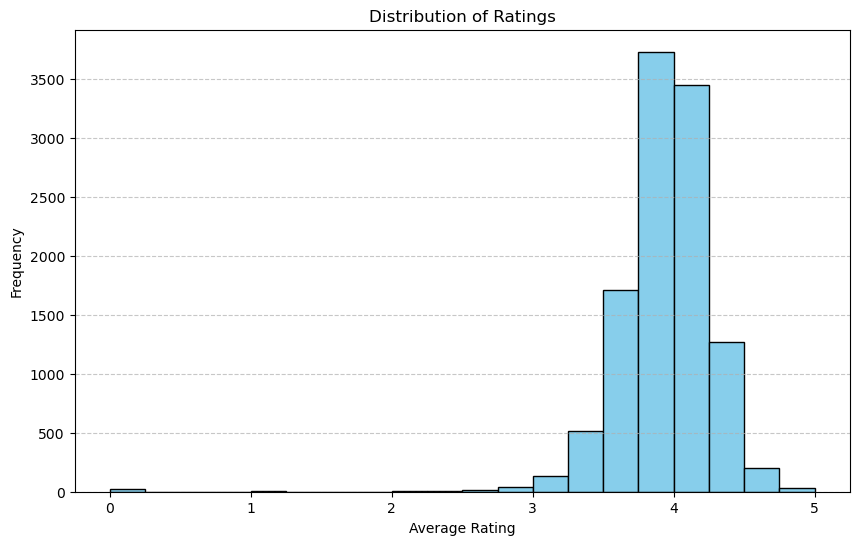

In [291]:
# Histogram for ratings

plt.figure(figsize=(10, 6))
plt.hist(booksG["average_rating"], bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution of Ratings")
plt.xlabel("Average Rating")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



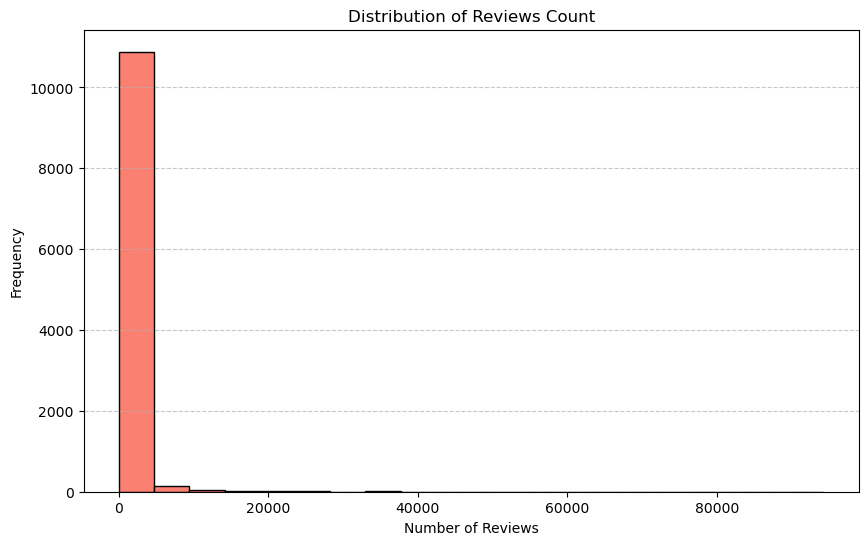

In [292]:
# Histogram for reviews

plt.figure(figsize=(10, 6))
plt.hist(booksG["reviews_count"], bins=20, color='salmon', edgecolor='black')
plt.title("Distribution of Reviews Count")
plt.xlabel("Number of Reviews")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 3. Correlation Analysis:

- Explore correlations between numerical columns using correlation coefficients (e.g., Pearson correlation).
- Understand relationships between ratings, reviews, and other numerical features.

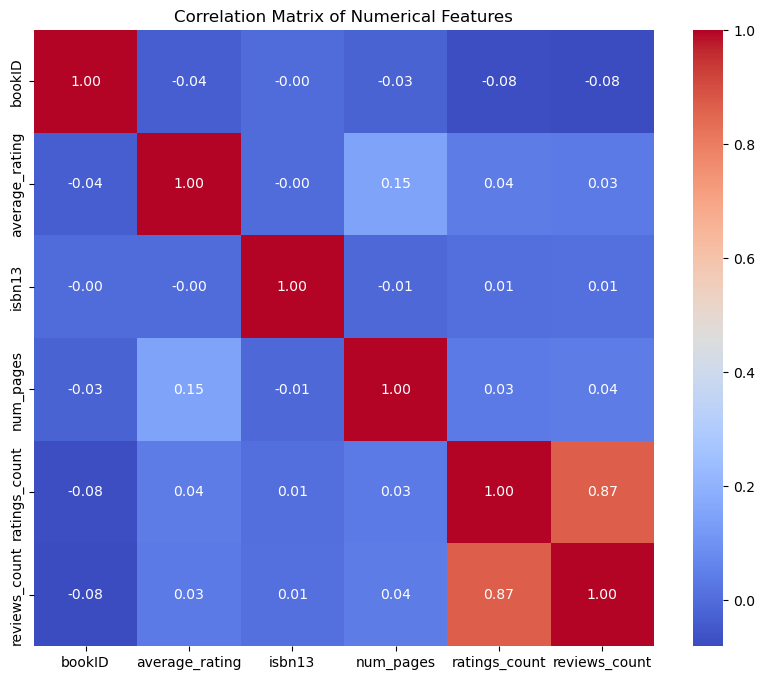

In [293]:
# Select only numerical columns
numerical_columns = booksG.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numerical_columns.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()

- Most of the correlations are weak or close to zero, except for the strong positive correlation between ratings_count and reviews_count. These two variables have a strong positive correlation of 0.87, indicating that books with more ratings tend to have more reviews, which is expected.


# 4. Time Series Analysis:

- Analyze trends over time using the publication_year column.
- Plot the number of books published each year.

In [294]:
# Convert 'publication_date' column to datetime format
booksG['publication_date'] = pd.to_datetime(booksG['publication_date'], format='%M/%d/%Y')

# Extract the year from the 'publication_date' column
booksG['publication_year'] = booksG['publication_date'].dt.year

In [295]:
# Count the number of books published by date

books_published_by_date = booksG["publication_year"].value_counts(ascending=False).head(10)
books_published_by_date

publication_year
2006    1700
2005    1260
2004    1071
2003     931
2002     798
2001     656
2000     534
2007     518
1999     451
1998     396
Name: count, dtype: int64

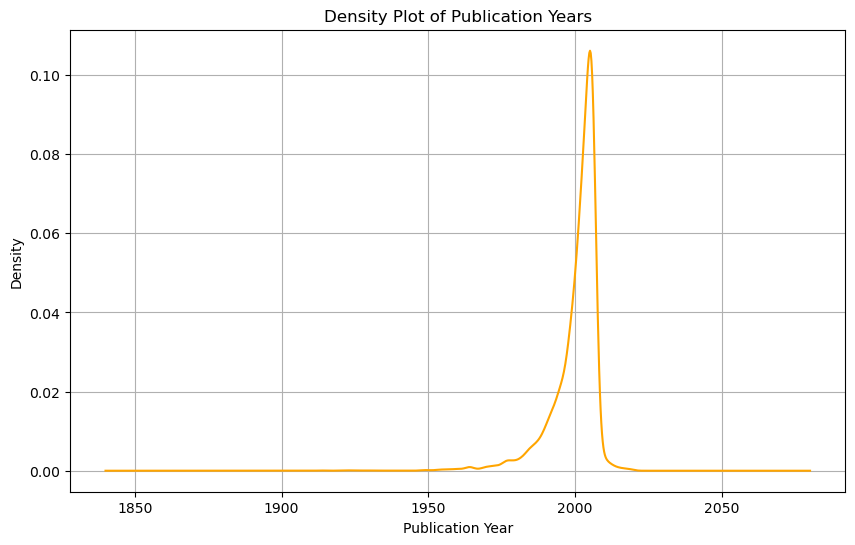

In [296]:
# Create a density plot of publication years

plt.figure(figsize=(10, 6))
booksG["publication_year"].plot(kind='density', color='orange')
plt.title("Density Plot of Publication Years")
plt.xlabel("Publication Year")
plt.ylabel("Density")
plt.grid(True)

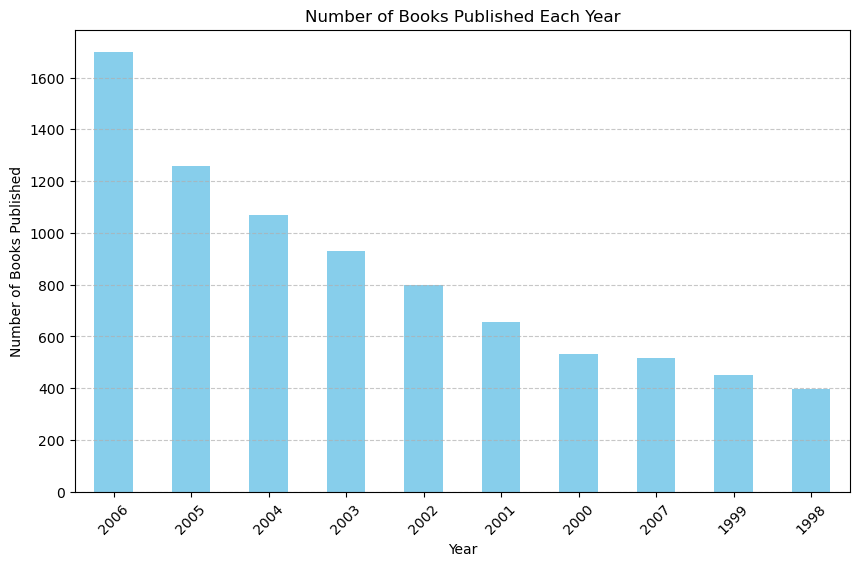

In [297]:
# Plot the number of books published each year

plt.figure(figsize=(10, 6))
books_published_by_date.plot(kind='bar', color='skyblue')
plt.xlabel('Year')
plt.ylabel('Number of Books Published')
plt.title('Number of Books Published Each Year')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 5. Genre Analysis:

- If there's a genre column, analyze the distribution of books across genres.
- Identify the most common genres and authors.

In [298]:
# Group the data by the year of publication and calculate the average number of pages each year

avg_pages_by_year = booksG.groupby('publication_year')['num_pages'].mean()
avg_pages_by_year

publication_year
1900    144.000000
1913    448.000000
1914    384.000000
1919    496.000000
1921    432.000000
           ...    
2016    241.000000
2017    344.571429
2018    212.800000
2019    224.666667
2020    360.000000
Name: num_pages, Length: 87, dtype: float64

# 6. Language Analysis:

- Explore the distribution of books by language using bar charts.

In [299]:
# Count the number of books for each language

language_counts = booksG["language"].value_counts()
language_counts.head()

language
English     8911
Spanish      218
French       144
German        99
Japanese      46
Name: count, dtype: int64

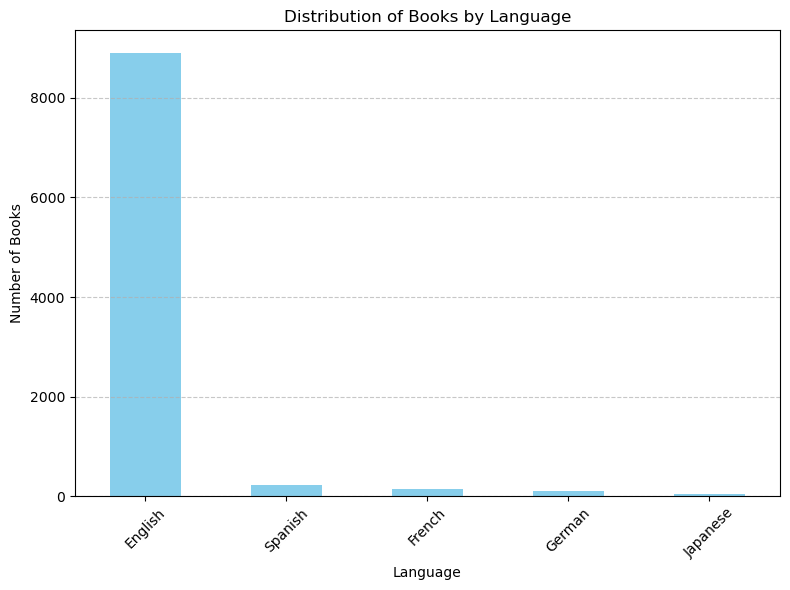

In [300]:
# Create a bar chart

plt.figure(figsize=(8, 6))
language_counts.head().plot(kind='bar', color='skyblue')
plt.title("Distribution of Books by Language")
plt.xlabel("Language")
plt.ylabel("Number of Books")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 7. Publisher Analysis:

- Analyze the distribution of books by publishers.
- Identify the publishers with the most published books.

In [301]:
# Count the number of books for each publisher

publisher_counts = booksG["publisher"].value_counts()
publisher_counts.head(5) # Top 5 publishers

publisher
Vintage             318
Penguin Books       261
Penguin Classics    184
Mariner Books       150
Ballantine Books    144
Name: count, dtype: int64

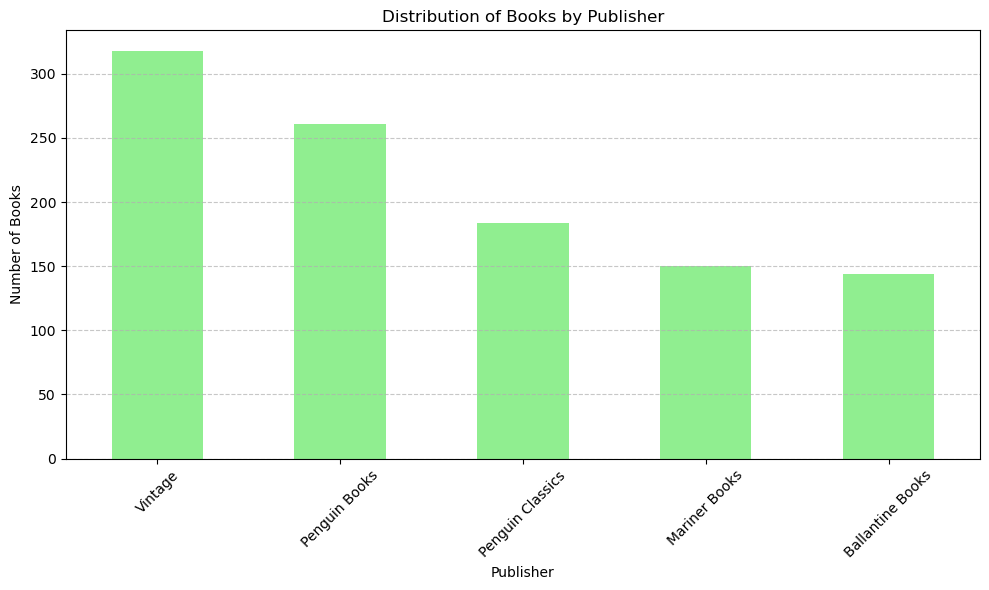

In [302]:
# Visualize the distribution

plt.figure(figsize=(10, 6))
publisher_counts.head().plot(kind='bar', color='lightgreen')  # Use 'pie' for a pie chart
plt.title("Distribution of Books by Publisher")
plt.xlabel("Publisher")
plt.ylabel("Number of Books")
plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 8. Top Authors and Books:

- Identify the top authors based on the number of books they've written.
- Find the highest-rated books and authors.

In [303]:
# Top Authors

top_authors = booksG["authors"].value_counts().head(10)
print("Top Authors based on the number of books written:\n")
print(top_authors)

Top Authors based on the number of books written:

authors
Stephen King        40
P.G. Wodehouse      40
Rumiko Takahashi    39
Orson Scott Card    35
Agatha Christie     33
Piers Anthony       30
Sandra Brown        29
Mercedes Lackey     29
Dick Francis        28
Terry Pratchett     23
Name: count, dtype: int64


In [304]:
# Highest-rated Books

highest_rated_books = booksG.sort_values(by="average_rating", ascending=False).head(10)
print("Highest-rated Books:\n")
highest_rated_books[["title", "authors", "average_rating"]]

Highest-rated Books:



,title,authors,average_rating
5650,Colossians and Philemon: A Critical and Exeget...,R. McL. Wilson,5.0
1243,Middlesex Borough (Images of America: New Jersey),Middlesex Borough Heritage Committee,5.0
5649,Winchester Shotguns,Dennis Adler/R.L. Wilson,5.0
6778,Delwau Duon: Peintiadau Nicholas Evans = Symph...,Nicholas Evans/Rhonda Evans,5.0
4935,Bulgakov's the Master and Margarita: The Text ...,Elena N. Mahlow,5.0
9897,His Princess Devotional: A Royal Encounter Wit...,Sheri Rose Shepherd,5.0
9286,Oliver Wendell Holmes in Paris: Medicine Theo...,William C. Dowling,5.0
786,Willem de Kooning: Late Paintings,Julie Sylvester/David Sylvester,5.0
4126,Zone of the Enders: The 2nd Runner Official St...,Tim Bogenn,5.0
9851,The American Campaign: U.S. Presidential Campa...,James E. Campbell,5.0


In [305]:
# Highest-rated Authors (Average rating of all books by each author)

authors_avg_rating = booksG.groupby("authors")["average_rating"].mean().sort_values(ascending=False).head(10)
print("Highest-rated Authors (based on average rating of their books):\n")
authors_avg_rating

Highest-rated Authors (based on average rating of their books):



authors
Aristophanes/F.W. Hall/W.M. Geldart    5.0
Sara Barton-Wood                       5.0
Keith Donohue                          5.0
Julie Sylvester/David Sylvester        5.0
John  Diamond                          5.0
R. McL. Wilson                         5.0
James E. Campbell                      5.0
Ian        Martin/Katie Elliott        5.0
Nicholas    Evans/Rhonda  Evans        5.0
Todd Davis/Marc Frey                   5.0
Name: average_rating, dtype: float64

# 9. ISBN Analysis:

- Check for duplicate ISBNs or missing values.
- Analyze the distribution of ISBNs.

In [306]:
# Check for duplicate ISBNs
duplicate_isbns = booksG.duplicated(subset='isbn', keep=False)
print("Duplicate ISBNs:")
print(booksG[duplicate_isbns]['isbn'])

# Check for missing values
missing_isbns = booksG['isbn'].isna().sum()
print("\nNumber of Missing ISBNs:", missing_isbns)

# Analyze the distribution of ISBNs
isbn_distribution = booksG['isbn'].value_counts()
print("\nDistribution of ISBNs:")
print(isbn_distribution)

Duplicate ISBNs:
Series([], Name: isbn, dtype: object)

Number of Missing ISBNs: 0

Distribution of ISBNs:
isbn
0439785960    1
0061020575    1
0060833254    1
0786929502    1
0345397606    1
             ..
0743233603    1
067103264X    1
0618195637    1
0743222334    1
8497646983    1
Name: count, Length: 11127, dtype: int64


- unique numbers to identify the book, the International Standard Book Number

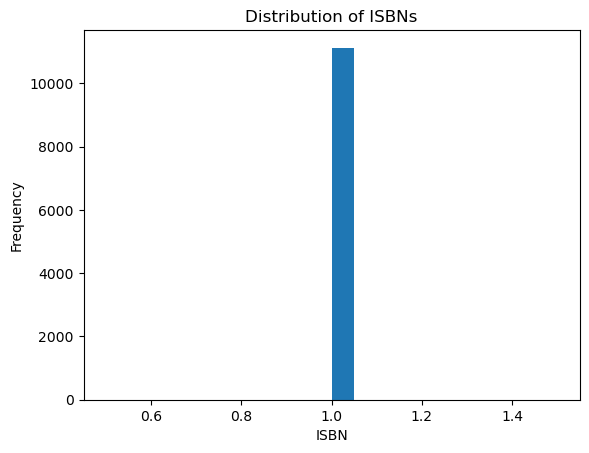

In [307]:
# Visualize the distribution of ISBNs (you can use appropriate plots here)
isbn_distribution.plot(kind='hist', bins=20, title='Distribution of ISBNs')
plt.xlabel('ISBN')
plt.ylabel('Frequency')
plt.show()

# 10. Text Analysis:

- If possible, perform natural language processing (NLP) on book titles or author names.
- Extract keywords, perform sentiment analysis, or identify common phrases.

In [308]:
from textblob import TextBlob

for title in booksG["title"]:
    # Create a TextBlob object for each title
    blob = TextBlob(title)
    
    # Perform sentiment analysis
    sentiment = blob.sentiment
    
    # Print the title and its sentiment
    print(f"Title: {title}")
    print(f"Sentiment: Polarity = {sentiment.polarity}, Subjectivity = {sentiment.subjectivity}")
    print()

Title: Harry Potter and the Half-Blood Prince (Harry Potter  #6)
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Title: Harry Potter and the Order of the Phoenix (Harry Potter  #5)
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Title: Harry Potter and the Chamber of Secrets (Harry Potter  #2)
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Title: Harry Potter and the Prisoner of Azkaban (Harry Potter  #3)
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Title: Harry Potter Boxed Set  Books 1-5 (Harry Potter  #1-5)
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Title: Unauthorized Harry Potter Book Seven News: "Half-Blood Prince" Analysis and Speculation
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Title: Harry Potter Collection (Harry Potter  #1-6)
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Title: The Ultimate Hitchhiker's Guide: Five Complete Novels and One Story (Hitchhiker's Guide to the Galaxy  #1-5)
Sentiment: Polarity = 0.05, Subjectivity = 0.7

Title: The Ultimate Hitchhiker's

Title: The Unfortunate Tobacconist & Other Mysteries (Sherlock Holmes 1-6)
Sentiment: Polarity = -0.3125, Subjectivity = 0.6875

Title: Personal Finance For Dummies
Sentiment: Polarity = 0.0, Subjectivity = 0.3

Title: Personal Finance for Dummies
Sentiment: Polarity = 0.0, Subjectivity = 0.3

Title: Catching Alice
Sentiment: Polarity = 0.6, Subjectivity = 0.9

Title: The Dream Giver
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Title: The Giver (The Giver  #1)
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Title: The Wish Giver: Three Tales of Coven Tree
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Title: Indian Givers: How the Indians of the Americas Transformed the World
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Title: The Last Life
Sentiment: Polarity = 0.0, Subjectivity = 0.06666666666666667

Title: The Hunters
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Title: When the World Was Steady
Sentiment: Polarity = 0.16666666666666666, Subjectivity = 0.5

Title: The Sea
Sentim

Title: The Complete Science Fiction Treasury of H.G. Wells
Sentiment: Polarity = 0.1, Subjectivity = 0.4

Title: Best Science Fiction Stories of H. G. Wells
Sentiment: Polarity = 1.0, Subjectivity = 0.3

Title: The Invisible Man
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Title: The Hound of the Baskervilles
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Title: The Hound of the Baskervilles (Sherlock Holmes  #5)
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Title: The Hound of the Baskervilles
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Title: Sherlock Holmes and the Case of the Hound of the Baskervilles (Great Illustrated Classics)
Sentiment: Polarity = 0.8, Subjectivity = 0.75

Title: Jamie's Italy
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Title: Jamie's Dinners: The Essential Family Cookbook
Sentiment: Polarity = 0.0, Subjectivity = 0.3

Title: The Lake of Souls (Cirque du Freak #10)
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Title: Freak the Mighty (Freak The Mighty

Title: Stay!: Keeper's Story
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Title: Gathering Blue (The Giver  #2)
Sentiment: Polarity = 0.0, Subjectivity = 0.1

Title: See You Around  Sam! (Sam Krupnik  #3)
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Title: King Lear
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Title: King Lear
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Title: King Lear
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Title: King Lear
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Title: The Turn of the Screw (Norton Critical Edition)
Sentiment: Polarity = 0.0, Subjectivity = 0.8

Title: The Turn of the Screw and The Aspern Papers
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Title: The Turn of the Screw and Other Short Fiction
Sentiment: Polarity = -0.0625, Subjectivity = 0.3375

Title: The Turn of the Screw
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Title: Much Ado about Nothing
Sentiment: Polarity = 0.2, Subjectivity = 0.2

Title: Much Ado About Nothing


Title: Essentials of American Government: Continuity and Change
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Title: American Government: Continuity and Change  Texas Edition
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Title: Stardust of Yesterday (de Piaget  #9; de Paiget/MacLeod  #1)
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Title: Moonage Daydream: The Life & Times of Ziggy Stardust
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Title: From Sawdust to Stardust: The Biography of DeForest Kelley
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Title: The Hitchhiker's Guide to the Galaxy (Hitchhiker's Guide  #1)
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Title: Coraline
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Title: Jurassic Park Institute Dinosaur Field Guide
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Title: Lost World of Agharti: The Mystery of Vril Power
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Title: I Am the Blues: The Willie Dixon Story
Sentiment: Pola

Title: The Coming
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Title: Forever Peace (The Forever War  #2)
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Title: Dealing in Futures
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Title: Study War No More: A Selection of Alternatives
Sentiment: Polarity = -0.25, Subjectivity = 0.5

Title: Not of Woman Born
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Title: Worlds Apart (Worlds 2)
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Title: Train_man  Volume 3 (Train_man)
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Title: The Best American Mystery Stories 2004
Sentiment: Polarity = 0.5, Subjectivity = 0.15

Title: Mystic River
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Title: Mystic River
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Title: Coronado: Stories
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Title: Prayers for Rain (Kenzie & Gennaro  #5)
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Title: A Drink Before the War (Kenzie &

Title: Psychonavigation: Techniques for Travel Beyond Time
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Title: The Stress-free Habit: Powerful Techniques for Health & Longevity from the Andes  Yucatan & the Far East
Sentiment: Polarity = 0.2, Subjectivity = 1.0

Title: Let Justice Roll Down
Sentiment: Polarity = -0.15555555555555559, Subjectivity = 0.2888888888888889

Title: The Namesake: A Portrait of the Film Based on the Novel by Jhumpa Lahiri
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Title: The Collected Poems of Robert Penn Warren
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Title: The Cave
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Title: The Glass Castle
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Title: The Little Baby Snoogle-Fleejer
Sentiment: Polarity = -0.1875, Subjectivity = 0.5

Title: Keeping Faith: Memoirs of a President
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Title: Animal  Vegetable  Miracle: A Year of Food Life
Sentiment: Polarity = 0.0, Subjec

Title: Crime Stories and Other Writings
Sentiment: Polarity = -0.125, Subjectivity = 0.375

Title: The Maltese Falcon
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Title: Lost Stories
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Title: The Dain Curse
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Title: The Big Knockover: Selected Stories and Short Novels
Sentiment: Polarity = 0.0, Subjectivity = 0.2

Title: Red Harvest
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Title: The Complete Stories  Vol 1
Sentiment: Polarity = 0.1, Subjectivity = 0.4

Title: Xénocide (Ender's Saga  #3)
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Title: Edgar A. Poe: Mournful and Never-ending Remembrance
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Title: Tales of Mystery and Madness
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Title: Elric of Melniboné (The Elric Saga  #1)
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Title: The Prize (deWarenne Dynasty  #4)
Sentiment: Polarity = 0.0, Subjectivit

Title: The Dragon Doesn't Live Here Anymore: Living Fully  Loving Freely
Sentiment: Polarity = 0.37878787878787873, Subjectivity = 0.75

Title: Running with the Demon (Word & Void #1)
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Title: The Voyage of the Jerle Shannara Trilogy (Voyage of the Jerle Shannara  #1-3)
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Title: The Black Unicorn (Magic Kingdom of Landover #2)
Sentiment: Polarity = 0.16666666666666669, Subjectivity = 0.7166666666666667

Title: Der Sohn von Shannara
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Title: First King of Shannara (Shannara Prequel)
Sentiment: Polarity = 0.25, Subjectivity = 0.3333333333333333

Title: The Best of Lester Del Rey
Sentiment: Polarity = 1.0, Subjectivity = 0.3

Title: The Phantom Menace (Star Wars: Novelizations  #1)
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Title: L'epée de Shannara
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Title: Star Wars. Episode I - Die dunkle Bedrohung
Sentim

Title: Murder in the Bastille (Aimee Leduc Investigations  #4)
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Title: The Thirteenth Tale
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Title: Market Forces
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Title: Black Widow: The Things They Say About Her
Sentiment: Polarity = -0.16666666666666666, Subjectivity = 0.43333333333333335

Title: Black Widow: Homecoming
Sentiment: Polarity = -0.16666666666666666, Subjectivity = 0.43333333333333335

Title: Ragtime
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Title: Ragtime in Simla (Joe Sandilands  #2)
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Title: Thank You for Smoking
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Title: The Crossing
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Title: Cities of the Plain (The Border Trilogy  #3)
Sentiment: Polarity = -0.21428571428571427, Subjectivity = 0.35714285714285715

Title: The Agony and the Ecstasy: A Biographical Novel of Michelangelo
Sentime

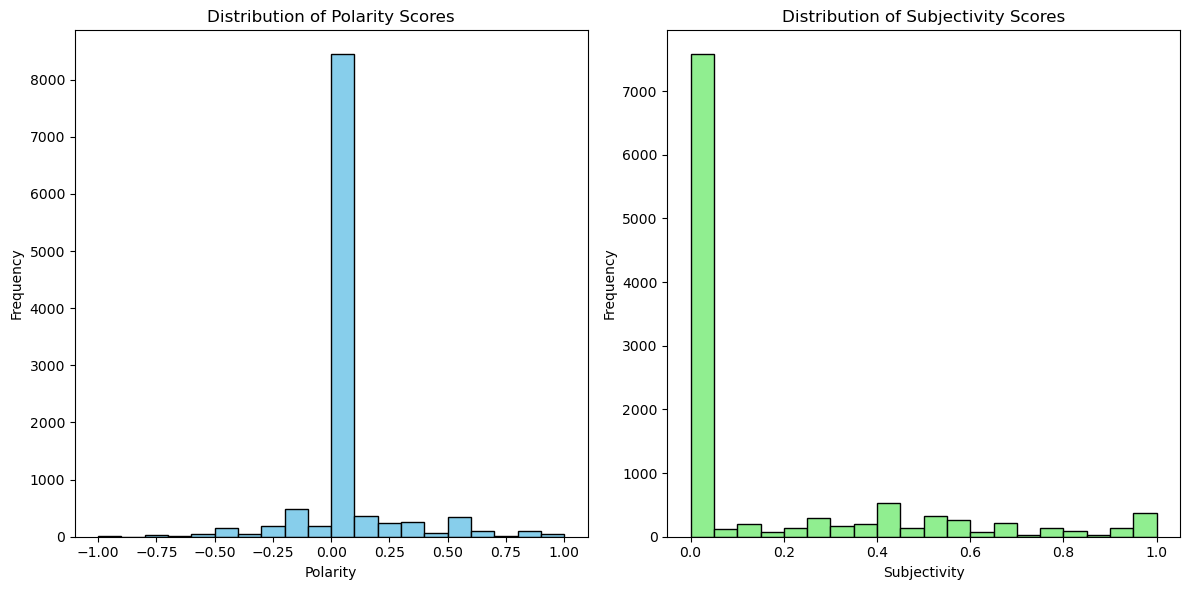

In [309]:
# Initialize lists to store polarity and subjectivity scores
polarity_title = []
subjectivity_title = []

# Perform sentiment analysis for each title and store the scores
for title in booksG["title"]:
    blob = TextBlob(title)
    sentiment = blob.sentiment
    polarity_title.append(sentiment.polarity)
    subjectivity_title.append(sentiment.subjectivity)

# Create histograms for polarity and subjectivity
plt.figure(figsize=(12, 6))

# Histogram for polarity
plt.subplot(1, 2, 1)
plt.hist(polarity_title, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Polarity Scores')
plt.xlabel('Polarity')
plt.ylabel('Frequency')

# Histogram for subjectivity
plt.subplot(1, 2, 2)
plt.hist(subjectivity_title, bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribution of Subjectivity Scores')
plt.xlabel('Subjectivity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

- Near 0 Polarity Scores: These scores indicate that a significant portion of the book titles are neutral in terms of sentiment polarity. They neither convey a strong positive nor a strong negative sentiment. Neutral titles may simply describe the content of the book without expressing strong emotions or opinions.

- Negative Polarity Scores: Titles with negative polarity scores suggest a tendency towards negative sentiment or tone. These titles may convey sadness, disappointment, criticism, or other negative emotions.

- Positive Polarity Scores: Titles with positive polarity scores indicate a tendency towards positive sentiment or tone. These titles may express happiness, excitement, admiration, or other positive emotions.

---------------------------------------------------------------------------------------------------------------------------

- Near 0 Subjectivity Scores: These scores suggest that a significant portion of the book titles are descriptive or factual in nature. They may be titles that focus on specific topics, concepts, or events rather than expressing opinions or sentiments.
- Positive Subjectivity Scores: Titles with positive subjectivity scores suggest a higher degree of subjectivity or opinion in the language used. They may include titles that express personal viewpoints, emotions, or attitudes towards a particular subject matter.

In [310]:
for author in booksG["authors"]:
    # Create a TextBlob object for each title
    blob = TextBlob(author)
    
    # Perform sentiment analysis
    sentiment = blob.sentiment
    
    # Print the title and its sentiment
    print(f"Author: {author}")
    print(f"Sentiment: Polarity = {sentiment.polarity}, Subjectivity = {sentiment.subjectivity}")
    print()

Author: J.K. Rowling/Mary GrandPré
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Author: J.K. Rowling/Mary GrandPré
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Author: J.K. Rowling
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Author: J.K. Rowling/Mary GrandPré
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Author: J.K. Rowling/Mary GrandPré
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Author: W. Frederick Zimmerman
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Author: J.K. Rowling
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Author: Douglas Adams
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Author: Douglas Adams
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Author: Douglas Adams
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Author: Douglas Adams/Stephen Fry
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Author: Douglas Adams
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Author: Bill Bryson
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Author: Bill Bryson
Sentiment: Pol

Author: Tracy Chevalier/Marie-Odile Fortier-Masek
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Author: Christopher   Clark
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Author: Jean Rabe
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Author: Antony Beevor
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Author: Tracy Chevalier
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Author: Ian McEwan
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Author: Alma Flor Ada/Elivia Savadier
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Author: Ken Follett
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Author: Ken Follett
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Author: Ken Follett
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Author: Marcia Angell
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Author: Marcia Angell
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Author: Ken Follett
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Author: Ken Follett/David Tennant
Sentiment: Polarity = 0.0, Subje

Author: Eugene Linden
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Author: Umberto Eco
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Author: Umberto Eco
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Author: Margaret  Rose/Heather Rose Jones
Sentiment: Polarity = 0.6, Subjectivity = 0.95

Author: Umberto Eco/Geoffrey Brock
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Author: Umberto Eco/Girolamo De Michele/Alastair McEwen/Agnolo di Cosimo Bronzino
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Author: Umberto Eco/William Weaver/R.C.S. Libri
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Author: Umberto Eco/John Radziewicz/William Weaver
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Author: Umberto Eco/William Weaver
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Author: Umberto Eco
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Author: Umberto Eco/Hugh Bredin
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Author: Umberto Eco
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Author: 

Author: Giuliana DePandi
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Author: Howard W. Stone/James O. Duke
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Author: Hirohiko Araki
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Author: Hirohiko Araki
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Author: Hirohiko Araki
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Author: Hirohiko Araki
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Author: Hirohiko Araki
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Author: Hirohiko Araki
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Author: Hirohiko Araki/Hirohiko Araki
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Author: Hirohiko Araki
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Author: George R.R. Martin
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Author: Ben Avery/Mike S. Miller/George R.R. Martin/Mike Crowell
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Author: George R.R. Martin/Roy Dotrice
Sentiment: Polarity = 0.0, Subjectivity = 0

Author: David   Ward/Parveen Adams/Seamus Heaney/Ivan Gaskell
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Author: Seamus Heaney
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Author: Seamus Heaney
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Author: Seamus Heaney/Margarita Ardanaz
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Author: Homer/Robert Fitzgerald/Seamus Heaney
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Author: John Milton/Scott Elledge
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Author: David Day
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Author: David D. Burns
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Author: David Gemmell
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Author: Astrid Lindgren/Florence Lamborn/Louis S. Glanzman
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Author: Astrid Lindgren/Gerry Bothmer
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Author: Astrid Lindgren/Florence Lamborn/Nancy Seligsohn
Sentiment: Polarity = 0.0, Subjectivity 

Author: Francine Pascal/Jamie Suzanne
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Author: Francine Pascal/Jamie Suzanne
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Author: Lewis Carroll/John Tenniel/Martin Gardner
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Author: Robert Sabuda/Lewis Carroll
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Author: Lewis Carroll/John Tenniel/Tan Lin
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Author: Lewis Carroll/Helen Oxenbury
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Author: Lewis Carroll/Hugh Haughton/John Tenniel
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Author: Lewis Carroll/Helen Oxenbury
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Author: Sun Tzu/Roger T. Ames
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Author: Michael Connelly
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Author: Anne Stuart
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Author: J.V. Jones
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Author: Stan J

Author: Brenda Joyce
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Author: Charles  Green/Richard Ford/Pascal Quidault
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Author: Norman Maclean/Annie Proulx
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Author: Norman Maclean
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Author: Fred Pearce
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Author: Elizabeth C. Economy
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Author: Bodie Thoene/Brock Thoene
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Author: Lance Armstrong/Sally Jenkins
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Author: Robert Kirkman/Charlie Adlard/Cliff Rathburn
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Author: Gayden Metcalfe
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Author: Linda Howard
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Author: Douglas Preston/Lincoln Child
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Author: Robert Kirkman/Charlie Adlard/Cliff Rat

Author: William Strunk Jr./E.B. White
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Author: David Weber
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Author: Lawrence Watt-Evans
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Author: Phillip C. McGraw
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Author: Phillip C. McGraw
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Author: Martha Heineman Pieper/William J. Pieper
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Author: Amy Tan/Gretchen Schields
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Author: Amy Tan
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Author: Amy Tan
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Author: Amy Tan/Joan Chen
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Author: Debra Marquart
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Author: Michael Syvanen/Clarence I. Kado
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Author: Lawrence Durrell
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Author: Lawrence Durr

Sentiment: Polarity = 0.0, Subjectivity = 0.0

Author: Gene Wolfe
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Author: Gene Wolfe
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Author: Tom Wolfe
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Author: Debra Cowan
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Author: Nelson DeMille/Otto Penzler
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Author: Better Homes and Gardens
Sentiment: Polarity = 0.5, Subjectivity = 0.5

Author: Hugh Honour
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Author: James  Hawkins
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Author: James  Hawkins
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Author: Elizabeth Peters
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Author: John Brunner
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Author: John Brunner
Sentiment: Polarity = 0.0, Subjectivity = 0.0

Author: Suzanne C. O'Connell Smeltzer/Brenda G. Bare/Mary Jo Boyer
Sentiment: Polarity = 0.0, Subjectivity = 0.

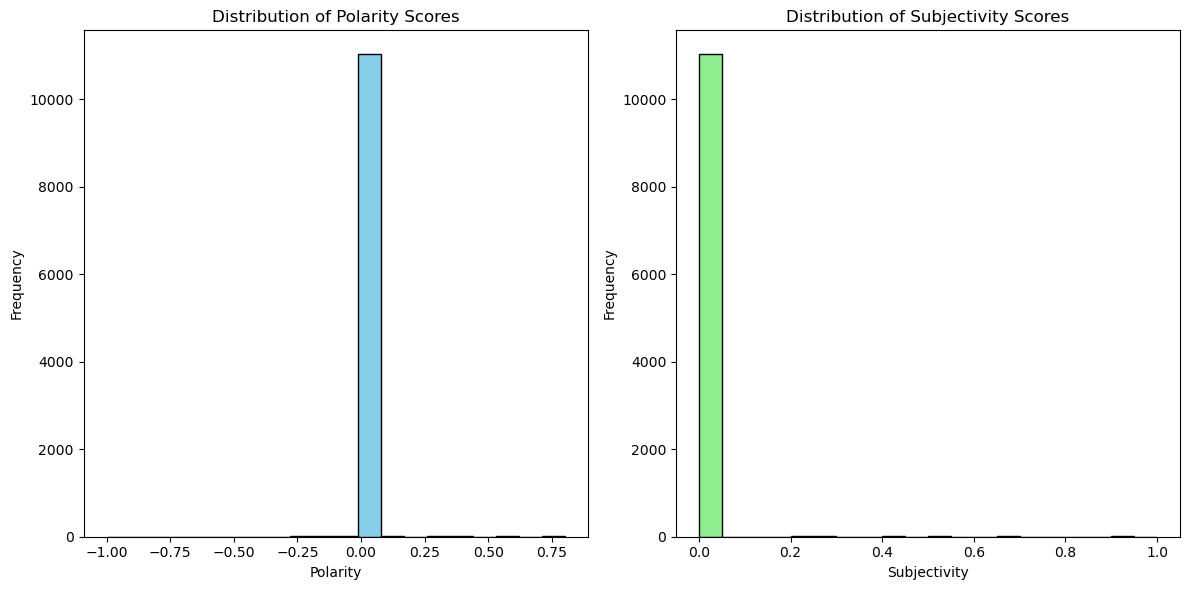

In [311]:
# Initialize lists to store polarity and subjectivity scores
polarity_author = []
subjectivity_author = []

# Perform sentiment analysis for each author name and store the scores
for author in booksG["authors"]:
    blob = TextBlob(author)
    sentiment = blob.sentiment
    polarity_author.append(sentiment.polarity)
    subjectivity_author.append(sentiment.subjectivity)

# Create histograms for polarity and subjectivity
plt.figure(figsize=(12, 6))

# Histogram for polarity
plt.subplot(1, 2, 1)
plt.hist(polarity_author, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Polarity Scores')
plt.xlabel('Polarity')
plt.ylabel('Frequency')

# Histogram for subjectivity
plt.subplot(1, 2, 2)
plt.hist(subjectivity_author, bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribution of Subjectivity Scores')
plt.xlabel('Subjectivity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

- Near 0 Polarity Scores: These scores indicate that a significant portion of the author names are neutral in terms of sentiment polarity. They neither convey a strong positive nor a strong negative sentiment. Neutral author names may simply identify the authors without expressing strong emotions or opinions.
- Negative Polarity Scores: Author names with negative polarity scores suggest a tendency towards negative sentiment or tone. However, there are almost none in this category, it might indicate that the majority of author names do not evoke negative sentiment.
- Positive Polarity Scores: Author names with positive polarity scores indicate a tendency towards positive sentiment or tone. Although there are very few in this category, they might represent authors whose names evoke positive associations, admiration, or other positive emotions.

--------------------------------------------------------------------------------------------------------------------------

- Near 0 Subjectivity Scores: These scores indicate that a significant portion of the author names are objective, conveying factual information without personal opinions or biases. Objective author names typically focus on identifying the authors without expressing subjective viewpoints.
- Negative Subjectivity Scores: The absence of negative subjectivity scores suggests that the majority of author names do not convey negative subjectivity. Negative subjectivity scores might indicate author names that evoke skepticism, criticism, or other negative attitudes.
- Positive Subjectivity Scores: The presence of very few positive subjectivity scores suggests that only a small proportion of author names convey positive subjectivity. Positive subjectivity scores might indicate author names that evoke admiration, praise, or other positive emotions.

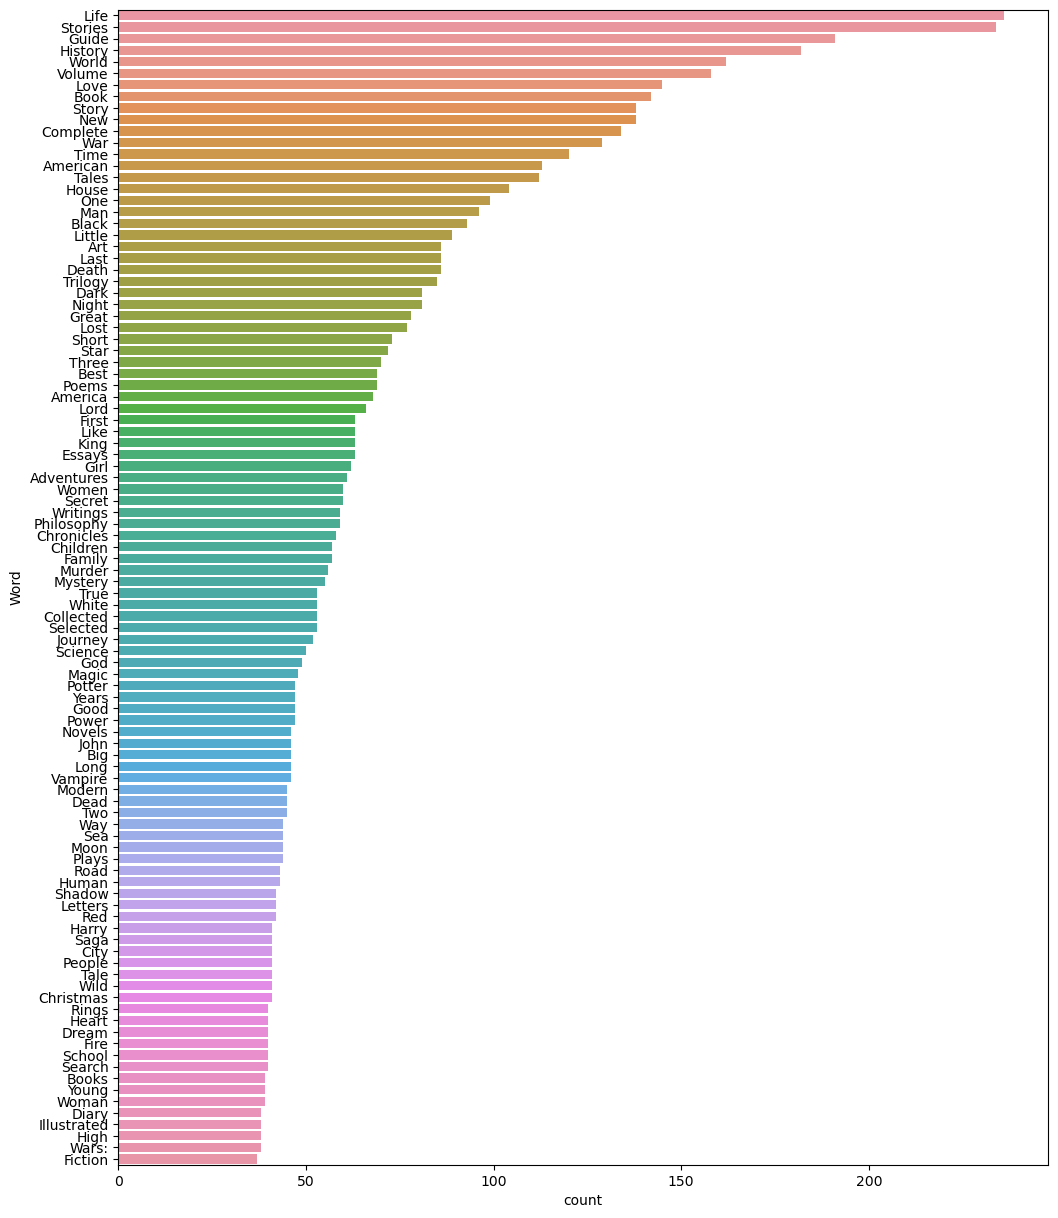

In [312]:

# Definición de las stopwords en inglés
stop_words = set(stopwords.words('english'))
additional_stopwords = ["el", "la", "de", "(the", "vol."]

def freqwords(x, terms): 
    # Concatenar todos los títulos en una sola cadena de texto
    allwords = ' '.join([text for text in x]) 
    # Dividir la cadena de texto en palabras
    allwords = allwords.split() 
    # Filtrar las palabras que no están en stopwords
    allwords = [word for word in allwords if word.lower() not in stop_words and not all(char in string.punctuation or char.isdigit() for char in word) and word.lower() not in additional_stopwords]  # Calcular la frecuencia de las palabras
    fdist = nltk.FreqDist(allwords) 
    # Crear un DataFrame con las palabras y sus frecuencias
    wordsdf = pd.DataFrame({'word': list(fdist.keys()), 'count': list(fdist.values())}) 
    # Seleccionar las palabras más frecuentes
    d = wordsdf.nlargest(columns="count", n=terms) 
    # Visualizar las palabras y sus frecuencias
    plt.figure(figsize=(12, 15)) 
    ax = sns.barplot(data=d, x="count", y="word") 
    ax.set(ylabel='Word') 
    plt.show()

# Imprimir las 100 palabras más frecuentes, sin considerar las stopwords
freqwords(booksG["title"], 100)

### 3. Keyword Extraction:

- Extract keywords or key phrases from book titles or author names to identify important terms or concepts.
- Use techniques such as TF-IDF (Term Frequency-Inverse Document Frequency) or TextRank for keyword extraction.

In [313]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Keyword extraction using TF-IDF
# Example using scikit-learn

tfidf_vectorizer = TfidfVectorizer(stop_words="english")
tfidf_matrix = tfidf_vectorizer.fit_transform(booksG["title"])
feature_names = tfidf_vectorizer.get_feature_names_out()
top_keywords = [feature_names[idx] for idx in tfidf_matrix.sum(axis=0).argsort()[::-1][:10]]
top_keywords


[array([['surprise', 'ball', '50th', ..., 'world', 'life', 'stories']],
       dtype=object)]

### 4. Common Words or Phrases Identification:

- Identify common words or phrases in book titles or author names to understand prevalent themes or trends.
- Use techniques such as word frequency analysis or word cloud visualization to identify common terms.

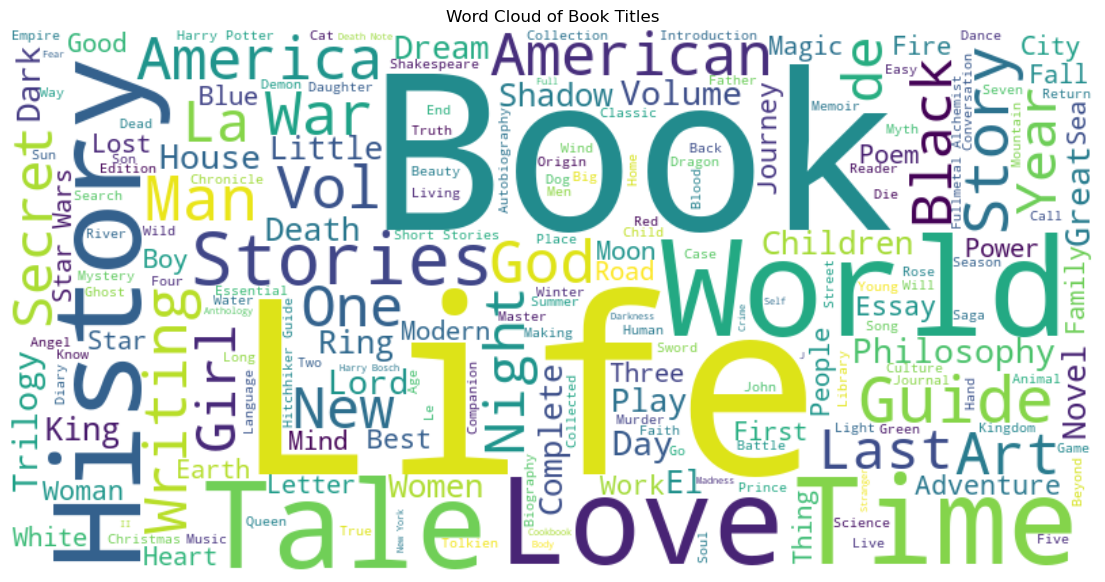

In [314]:
# Word cloud visualization for common words in book titles
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(booksG["title"]))
plt.figure(figsize=(14, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Book Titles");

 - word cloud visualization, larger words represent book titles that occur more frequently in the dataset.

In [315]:
#Saving DataFrames I've created to .csv for further works

booksG.to_csv("booksG_final.csv", index=False)

In [316]:
# Saving DataFrame to Excel - we need this format for Tableau

booksG.to_excel("booksG_final.xlsx", index=False)